<a href="https://colab.research.google.com/github/zakariajaadi/data-science-portofolio/blob/main/Student's%20t-test%20Hypothesis%20Testing%20with%20Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## Defintion of t-test
The t-statistic (or Student's t-test) is a statistical test used to assess whether the means of one or two groups are significantly different from each other. It's particularly useful when the sample size is small $n<30$ or when the population variance is unknown (which is very common in practice).  While it can be used with small samples, the t-test is valid for any sample size, large or small, as long as the underlying assumptions are met (more on this below).  It's a useful alternative to the z-test, which requires the population variance to be known.
## Types of t-test

There are different types of t-tests:

1. **One-Sample t-test:** Used to compare the mean of a single sample to a known or hypothesized value (e.g., a population mean or a target value).

2. **Independent Samples t-Test:** Used to compare the means of two independent groups.  There are two versions of this test:
  1. **pooled variance t-test** one that assumes equal variances between the two groups
  2. **Welch's t-test:** does not assume equal variances between the two groups

  The choice between these two depends on whether the variances of the two groups are equal or not.

3. **Paired Sample t-Test (Dependent t-Test)**: Used when comparing the means of two related groups or the same group at different times (e.g., before and after an intervention).  This test analyzes the differences between the paired measurements.

## T-test main assumptions

1. **Independence:** Data points are independent of each other (one observation doesn't influence another).
2. **Normality:** Data is approximately normally distributed.  This matters more for small samples. For larger samples (generally >30), the t-test is robust even if the data isn't perfectly normal.
3. **Random Sampling:** Data is collected through a random sampling process from the population of interest. This ensures the sample is representative.

# 2- One sample t-test implementation with scipy

In [ ]:
import numpy as np
import scipy.stats as stats

# 1. Your class's test scores
class_scores = np.array([78, 82, 90, 70, 75, 85, 68, 92, 77, 80, 88, 73, 79, 81, 83, 76, 87, 72, 95, 65, 89, 74, 91, 69, 84])

# 2. National average (population mean)
national_average = 75


# H0 (Null Hypothesis): The class's mean score is equal to the national average.
# H1 (Alternative Hypothesis): The class's mean score is different from the national average.

# 3. Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(class_scores, national_average)
# 4. Print the results
print(f"T-statistic: {t_statistic:.2f}")
print(f"T-statistic: {t_statistic:.2f}")

print(f"P-value: {p_value:.3f}")

# 5. Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("The class performed significantly differently from the national average.")
    if np.mean(class_scores)> national_average:
        print("The class performed significantly better than the national average.")
    else:
        print("The class performed significantly worse than the national average.")
else:
    print("There is no significant difference between the class's performance and the national average.")



T-statistic: 3.10
P-value: 0.005
The class performed significantly differently from the national average.
The class performed significantly better than the national average.


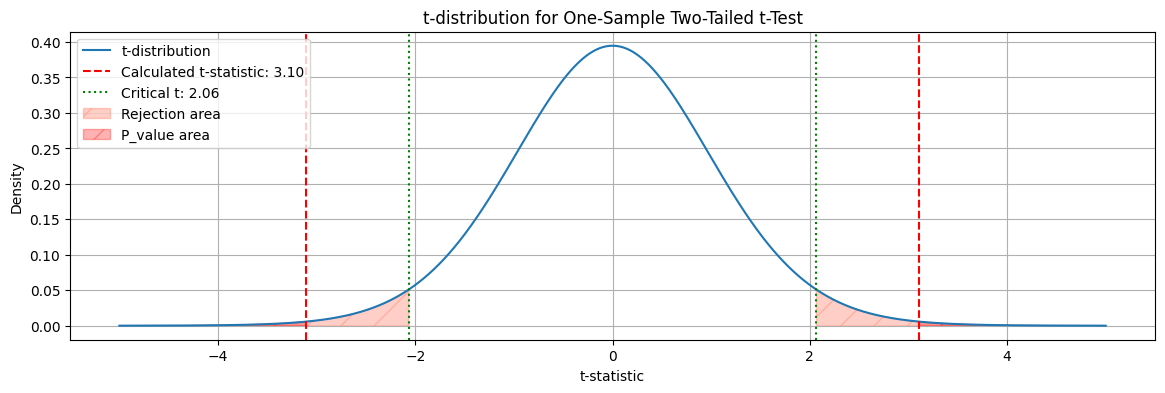

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Plotting the t-distribution curve
x = np.linspace(-5, 5, 1000)
df = len(class_scores) - 1  # Degrees of freedom (n - 1)
t_dist = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.plot(x, t_dist, label="t-distribution")
plt.title("t-distribution for One-Sample Two-Tailed t-Test")
plt.xlabel("t-statistic")
plt.ylabel("Density")

# Adding the observed t-statistic
plt.axvline(t_statistic, color='r', linestyle='--', label=f'Calculated t-statistic: {t_statistic:.2f}')
plt.axvline(-t_statistic, color='r', linestyle='--')

critical_t = stats.t.ppf(1 - alpha/2, df)  # For two-tailed test
plt.axvline(critical_t, color='green', linestyle=':', label=f'Critical t: {critical_t:.2f}')
plt.axvline(-critical_t, color='green', linestyle=':')

# For two-tailed test, we shade the areas in both tails
plt.fill_between(x, t_dist, where=(x <= -critical_t) | (x >= critical_t), color='tomato',hatch="/", alpha=0.3,label="Rejection area")

# For two-tailed test, we shade the areas in both tails
plt.fill_between(x, t_dist, where=(x <= -t_statistic) | (x >= t_statistic), color='red',hatch="/", alpha=0.3, label="P_value area")


# Adding labels
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()


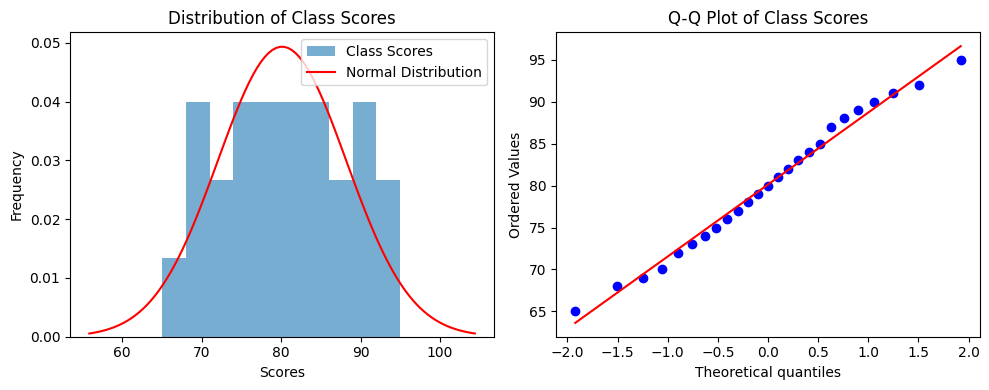

In [73]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figsize as needed

# --- Plot 1: Histogram ---
axes[0].hist(class_scores, bins=10, density=True, alpha=0.6, label='Class Scores')
axes[0].set_title('Distribution of Class Scores')
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Frequency')

mu, sigma = np.mean(class_scores), np.std(class_scores)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r', label='Normal Distribution')
axes[0].legend()

# --- Plot 2: Q-Q Plot ---
stats.probplot(class_scores, dist="norm", plot=axes[1])  # Use axes[1] for the Q-Q plot
axes[1].set_title('Q-Q Plot of Class Scores')



# Adjust spacing between subplots (optional)
plt.tight_layout()

plt.show()

In [71]:
from scipy.stats import shapiro
stat, p = shapiro(class_scores)
print(f"Shapiro-Wilk Test: W={stat:.3f}, p={p:.3f}")
if(p>0.05): print("Data is likely normal")
else:print("Data deviates from normality")

Shapiro-Wilk Test: W=0.979, p=0.863
Data is likely normal


In [77]:
np.random.normal(loc=50, scale=10, size=100).astype(int).dis

array([71, 33, 48, 35, 36, 53, 57, 61, 46, 45, 67, 38, 57, 53, 52, 64, 39,
       57, 70, 40, 64, 40, 51, 44, 51, 62, 41, 50, 46, 43, 46, 48, 42, 45,
       59, 54, 54, 56, 44, 26, 61, 45, 34, 38, 44, 61, 37, 52, 43, 53, 39,
       41, 37, 48, 29, 49, 45, 66, 46, 48, 50, 48, 48, 43, 45, 47, 51, 55,
       64, 43, 38, 45, 54, 54, 34, 48, 49, 39, 65, 36, 44, 56, 31, 46, 37,
       33, 59, 88, 46, 59, 51, 45, 44, 31, 56, 57, 48, 34, 46, 41])

# 2- One sample t-test implementation with scipy